## 從字庫裡面把字隨機挑出來組成二字詞或三字詞，然後強迫他們滿足Zipf's law，之後用這些滿足Zipf's law 的詞組成文本。把兩個不同alpha值的文本合在一起。

In [1]:
import random 
import bisect 
import math 
from functools import reduce
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from count import *
from zipfgen import ZipfGenerator
%matplotlib inline

In [2]:
def read_file_generate_fake(char_num = 2, out_file =  'fake1.txt', sample_word_num = 8000,
                            num_word_in_fake_scrip = 15000, 
                            alpha = 1.00001, alpha2 = 1.001, noun = False):
    """Read "roc2.txt" file, and then generate a fake script satisfying Zipfs' law. All the words in 
    the output script share the same lenth char_num
    """
    SAMPLE_WORD_NUM = sample_word_num
    ALPHA = alpha
    ALPHA2 = alpha2
    NUM_WORD_IN_NOV = num_word_in_fake_scrip
    OUTPUT_FILE_NAME = out_file
    NOUN = noun
    CHAR_NUM = char_num
    
    zipf_gen_1 =  ZipfGenerator(SAMPLE_WORD_NUM,ALPHA)
    zipf_gen_2 =  ZipfGenerator(SAMPLE_WORD_NUM,ALPHA2)
    f =  open("roc2.txt","r")

    world_list = []
    
    for line in f:
        line_split = line.split("\t")
        if NOUN:
            if 'N' in line_split[4]:
                world_list.append(line_split[3])
        else:
            #if len(line_split[3]) == CHAR_NUM:
                world_list.append(line_split[3])

    f.close()
    
    for item in world_list:
        if item == " ":
            world_list.remove(item)
    #######################################
    #######these codes are optional######## 
    
    tmp_list = []
    for item in world_list:
        for e in list(item):
            tmp_list.append(e)
    random.shuffle(tmp_list)
    list_2 = []
    tmp = ''
    for e in tmp_list:
        tmp = tmp + e
        if len(tmp) == char_num:
            list_2.append(tmp)
            tmp = ''
    
    world_list = list_2

    print("words in a corpus: " ,len(world_list))
    
    ###########optional codes end##########
    #######################################


    print("A corpus is successfully loaded.")
    
    random.shuffle(world_list)
    small_world_list_1 = world_list[-SAMPLE_WORD_NUM:]
    random.shuffle(world_list)
    small_world_list_2 = world_list[-SAMPLE_WORD_NUM:]
    target_string_list = []

    for i in range(NUM_WORD_IN_NOV):
        if i % 2 == 0: 
            num = zipf_gen_1.next()
            w = small_world_list_1[num]
        else: 
            num = zipf_gen_2.next()
            w = small_world_list_2[num]                
        
        target_string_list.append(w+" ")
        
    f2 = open(OUTPUT_FILE_NAME , 'w')

    word_count = 0
    for item in target_string_list:
        if word_count < 20:
            f2.write(item)
            word_count += 1
        else:
            word_count = 0
            f2.write(item+"\n")
    f2.close()
    print("A fake script is successfully created !")
    print("--------------------")
    return None

## 改動不同的參數以產生你想要的文本
#### 參數解釋：
* char_num: 假文本裡面每個單詞的字數
* out_file: 輸出的假文本的檔名
* sample_word_num: zipf's law 的參數之一
* num_word_in_fake_scrip: 輸出的假文本總共有多少單詞
* alpha: Zipf's law 的參數之二
* noun: 只選roc2.txt(中研院詞庫)中的名詞與否

words in a corpus:  32439
A corpus is successfully loaded.
A fake script is successfully created !
--------------------
Read file successfully!
Successfully count word freqency!
Successfully count char freqency!
Successfully build data frames!


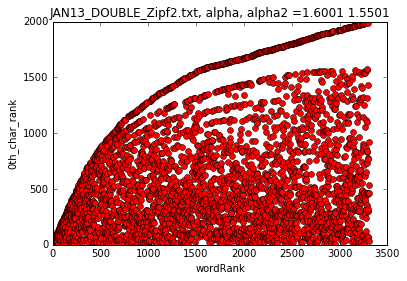

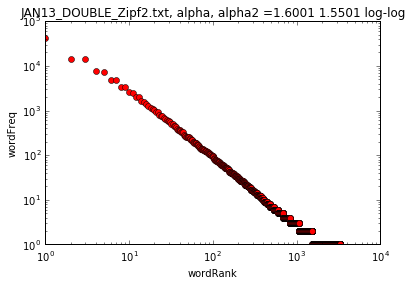

In [6]:
filename = 'JAN13_DOUBLE_Zipf2.txt' #change filename if you want to get statictical information of another
##text file.
ALPHA = 1.6001
ALPHA2 = 1.5501

read_file_generate_fake(char_num = 2, out_file =  filename, sample_word_num = 8000,
                            num_word_in_fake_scrip = 200000, 
                            alpha = ALPHA, alpha2 = ALPHA2, noun = False)
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)
##if anything gets into trouble, use (1) instead of (2), and vise versa.

big, char, word = main(filename,encode) 

draw(big,feature = ["0th_char_rank","wordFreq"], x_label = "wordRank", y_label = "charRank",  
         title = filename + ", alpha, alpha2 =" + str(ALPHA) +' '+str(ALPHA2))

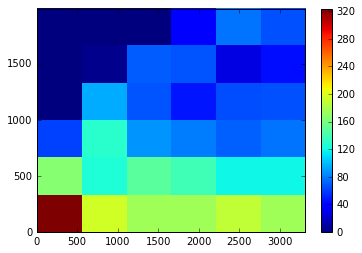

In [7]:
draw_density_plot(big, 6 )

In [8]:
print(check_const_ratio(big, feature= "wordRank", criteria = "wordFreq",max_range = 200))

wordRank  ratio:  [ 0.46779559  0.68907563  0.77673546  0.83816425  0.870317    0.88410596
  0.90074906  0.92931393  0.92393736  0.95157385  0.94910941  0.9463807
  0.95184136  0.95535714  0.96261682  0.96763754  0.94983278  0.97183099
  0.9673913   0.96629213  0.97674419  0.96428571  0.99176955  0.97925311
  0.97457627  0.97391304  0.95089286  0.98591549  0.97142857  0.98529412
  0.99004975  0.97487437  0.99484536  0.96891192  0.97860963  0.98907104
  0.97790055  0.97740113  0.98265896  0.96470588  0.99390244  0.98159509]
std=  0.094118196621
[  3.30700000e+03   4.67795585e-01   6.89075630e-01   7.76735460e-01
   8.38164251e-01   8.70317003e-01   8.84105960e-01   9.00749064e-01
   9.29313929e-01   9.23937360e-01   9.51573850e-01   9.49109415e-01
   9.46380697e-01   9.51841360e-01   9.55357143e-01   9.62616822e-01
   9.67637540e-01   9.49832776e-01   9.71830986e-01   9.67391304e-01
   9.66292135e-01   9.76744186e-01   9.64285714e-01   9.91769547e-01
   9.79253112e-01   9.74576271e-01  